In [1]:
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
food = pd.read_csv('Food_Products.csv',low_memory=False)

In [3]:
food.head()

,Unnamed: 0,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories_en,origins,...,potassium_100g,calcium_100g,iron_100g,magnesium_100g,zinc_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,country
0,0,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
1,1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,0.00129,NaN,NaN,NaN,14.0,14.0,NaN,United States
2,2,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,...,NaN,0.071,0.00129,NaN,NaN,NaN,0.0,0.0,NaN,United States
3,3,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,...,NaN,0.143,0.00514,NaN,NaN,NaN,12.0,12.0,NaN,United States
4,4,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States


Looks like our new csv file saved the index of the previous data frame as the column Unnamed: 0. Let's get rid of it to clean up our file. 

In [68]:
food.drop(['Unnamed: 0'],axis=1,inplace=True)
#combining saturated and trans fat into one variable
food['bad-fats_100g'] = food['saturated-fat_100g'] + food['trans-fat_100g']

In order to analzye the general nutrition characteristics of the food products, it will be helpful to know the amount of energy, saturated fat, trans fat, fiber, sodium, sugars, and protein contained in each product. Let's only select rows where this information is not missing. 

In [5]:
nutrients = food.dropna(subset=['saturated-fat_100g', 'trans-fat_100g',
             'fiber_100g','sugars_100g','proteins_100g','sodium_100g'], how='any')
nutrients = nutrients.fillna(0, axis=1) #fill remaining missing values as 0 
len(nutrients)

132766

__Taking A Quick Look At Nutritional Content of Products__

Let's try to figure out which countries offer the healthiest products. Though there are many schools of thought when it comes to evaluating nutrition labels, one should typically avoid foods high in sugar, saturated and trans fats, and sodium while foods high in protein and fiber are considered healthy to eat.

In [7]:
#focusing on mean nutrient value per product by country 
avoid = nutrients.groupby('country')[['sugars_100g','bad-fats_100g','sodium_100g']].agg('mean')
want = nutrients.groupby('country')[['proteins_100g','fiber_100g']].agg('mean')

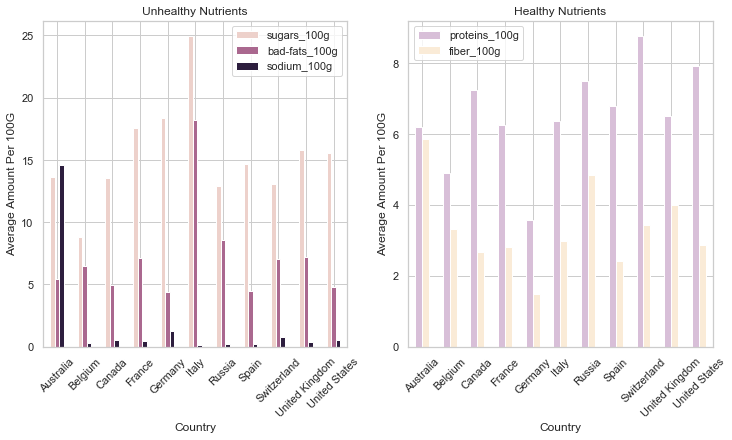

In [8]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12,6),sharex=True)

avoid.plot.bar(color=(sns.cubehelix_palette(3)),ax=axs[0])
axs[0].set_title("Unhealthy Nutrients")

want.plot.bar(color=('thistle','antiquewhite'),ax=axs[1])
axs[1].set_title("Healthy Nutrients")

for ax in axs.flat:
    ax.set(xlabel='Country',ylabel="Average Amount Per 100G")
    ax.tick_params(axis='x', labelrotation=45)
    
show()



Sugar has fairly detrimental affects on health. It can lead to weight gain, increased risk of type 2 Diabetes, food addictions, and chronic digestive issues. Saturated and trans fats can causes increases in harmful LDL cholesterol levels, create inflammation, and contribute to insulin resistance. Excess sodium can lead to elevated blood pressure and cause varying health problems. 

Italy clearly takes home the gold when it comes to average sugar and fat content while Australia is the runner-up in terms of sodium. In general, most countries products tend to be fairly high in sugar. 

Protein is essential within a diet as it is used by our bodies to build and repair tissues. Our body is unable to store protein and needs relatively large quantities of it. Fiber aids our bodies in regulating digestion and lowers cholesterol levels. It is recommended to eat foods high in fiber to help achieve a healthy weight. 

From the above plots, we observe that Switzerland offers products with the highest average protein content while Australia's products have the highest average fiber content. 

Sources:
https://www.health.harvard.edu/blog/eating-too-much-added-sugar-increases-the-risk-of-dying-with-heart-disease-201402067021#:~:text=Eating%20too%20much%20added%20sugar%20increases%20the%20risk,with%20the%20percentage%20of%20sugar%20in%20the%20diet.

https://www.health.harvard.edu/staying-healthy/the-truth-about-fats-bad-and-good#:~:text=Eating%20foods%20rich%20in%20trans%20fats%20increases%20the,heart%20disease%2C%20stroke%2C%20diabetes%2C%20and%20other%20chronic%20conditions

https://thehealthyfish.com/4-important-things-look-nutrition-labels/

https://www.webmd.com/men/features/benefits-protein#1

https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/in-depth/fiber/art-20043983

__Which Country Offers the Healthiest Food Items?__

Let's see which country offers products with the greatest amount of protein and fiber per 100g. 

Text(0, 0.5, 'Max Amount Per 100G')

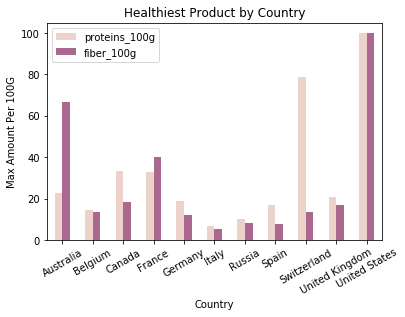

In [11]:
#finding the max nutrient content of all products by country 
max_nutrients = nutrients.groupby('country')[['proteins_100g','fiber_100g']].agg('max')
sns.set(style="whitegrid")
max_nutrients.plot.bar(color=(sns.cubehelix_palette(3)))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Healthiest Product by Country")
plt.xlabel("Country")
plt.ylabel("Max Amount Per 100G")

It seems a little odd that the US has a product with a 100g of protein and another with 100g fiber ... for a product to have 100 grams of protein or fiber per 100 grams, it must be entirely made up of protein or fiber. Let's see what these products are. 

In [17]:
#selecting country as US
usa = nutrients[nutrients['country']=='United States']
usa[['product_name','serving_size','brands','energy_100g','fat_100g','fiber_100g','proteins_100g']].sort_values(by='proteins_100g',ascending=False)[:3]

,product_name,serving_size,brands,energy_100g,fat_100g,fiber_100g,proteins_100g
152137,Tcho-A-Day Dark Chocolate,8 g (1 BAR),Tcho,2301.0,35.00,0.0,100.00
41498,Unflavored Gelatin,7 g (7 g),Meijer,1795.0,0.00,0.0,100.00
18852,"Fisherman's Wharf, Cocktail Shrimp",22 g (8 SHRIMP AND 0.8 OZ SAUCE | ABOUT),Winn-Dixie Stores Inc.,2092.0,6.82,0.0,86.36


Unless the Tcho-A-Day Dark Chocolate bar actually is made of pure protein (if so, please tell me where to find it 😋), its protein content is probably the result of a data entry error. Otherwise, unflavored gelatin (a protein product derived from collagen) takes the gold for the US. This product is typically 99% protein and often taken as a protein supplement. 

In [15]:
#top 3 USA products with the highest fiber content
usa[['product_name','serving_size','brands','energy_100g','fat_100g','fiber_100g','proteins_100g']].sort_values(by='fiber_100g',ascending=False)[:3]

,product_name,serving_size,brands,energy_100g,fat_100g,fiber_100g,proteins_100g
87624,"Yamashin, Powdered Agar-Agar",4 g (1 PACKAGE),Wismettac Asian Foods Inc.,1046.0,0.0,100.0,0.0
37059,Premium Guar Gum,10 g (1 Tbsp),Bob's Red Mill,1255.0,0.0,90.0,0.0
77233,Xanthan Gum,1.15 g (0.5 tsp),0,0.0,0.0,87.0,0.0


The products the US offers with the highest fiber content are all a little unusual. Agar-agar is a jelly-like product derived from seaweed. Guar gum consist of the fiber from the seed of the guar plant and Xantham gum is a plant-based thickening and stabilizing agent. All three of these products are typically used as thickening or stablizing agents within vegan cooking to help food imitate the consistency or creamyness provided from using animal products. These products may indicate that a market for vegan, animal-product substitutes exists in the US.

While we're on the topic of vegan products...

__Let's Look At The Popularity of Alternative Diets By Country__

If a product fits a vegetarian diet, than it contains no animal meat products. If it fits a vegan diet, it contains no animal or dairy products. Foods that are vegan are also vegetarian. If a food product is vegan/vegetarian, it is recorded in the product's label column. If a product has meat and/or dairy products, it is recorded in the categories column. 

The following code grabs the appropriate tag. 

Some food items lack information on their categories or labels. If this is case, the product's special diet will be labeled as 'Not Specified'. We will exclude these products from our analysis. 

In [69]:
#need to cast the columns labels_en and categories_en as strings
diets = food.copy()
diets[['labels_en','categories_en']] = food[['labels_en','categories_en']].astype(str)

In [70]:
def label_diets(row):
    if ('vegan' in row['labels_en'].lower()):
        return 'Vegan'
    if ('vegetarian' in row['labels_en'].lower()):
        return 'Vegetarian'
    if ('dair' in row['categories_en'].lower()):
        return 'Dairy Product'
    if ('meat' in row['categories_en'].lower()): 
        return 'Meat Product'
    
    return 'Not Specified'

#applying above function to every row
diets['Special Diet'] = diets.apply(lambda row: label_diets(row), axis=1)

Text(0, 0.5, 'Proportion of Products')

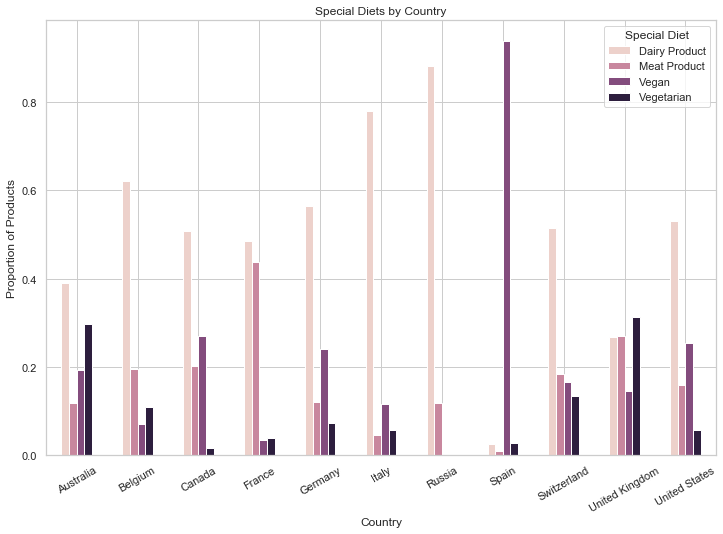

In [78]:
diets = diets[diets['Special Diet']!= 'Not Specified']

#gives us proportion of popularity of each diet to normalize for amount of products per country
diet_by_country = diets.groupby('country')['Special Diet'].value_counts(normalize=True)

sns.set(style="whitegrid")
diet_by_country.unstack().plot(kind='bar', color=(sns.cubehelix_palette(4)), figsize=(12,8))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Special Diets by Country")
plt.xlabel("Country")
plt.ylabel("Proportion of Products")

Wow! The majority of Spain's products in this dataset are vegan and no other country comes close. All of the countries seem to have fairly high proportions of dairy products with Russia taking the lead. France offers the greatest proportion of meat products while the UK and Australia are tied for the number of vegetarian products. 

*Remember that any vegan products can also be classified as vegetarian. We chose to separate them here to see how countries differ in products offered between these two categories.*

__Does The Nutritional Content of Products Differ By Special Diet Category?__

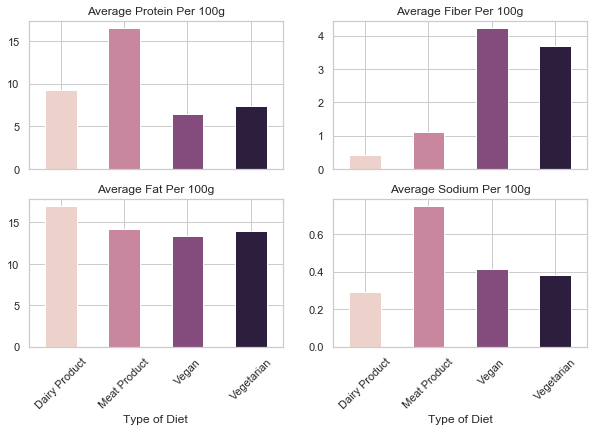

In [79]:
proteins = diets.groupby(['Special Diet'])['proteins_100g'].mean()
fiber = diets.groupby(['Special Diet'])['fiber_100g'].mean()
fats = diets.groupby(['Special Diet'])['fat_100g'].mean()
sodium = diets.groupby(['Special Diet'])['sodium_100g'].mean()

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(10,6),sharex=True)

proteins.plot.bar(color=(sns.cubehelix_palette(4)),ax=axs[0,0])
axs[0, 0].set_title('Average Protein Per 100g')

fiber.plot.bar(color=(sns.cubehelix_palette(4)),ax=axs[0,1])
axs[0, 1].set_title('Average Fiber Per 100g')

fats.plot.bar(color=(sns.cubehelix_palette(4)),ax=axs[1,0])
axs[1, 0].set_title('Average Fat Per 100g')

sodium.plot.bar(color=(sns.cubehelix_palette(4)),ax=axs[1,1])
axs[1,1].set_title('Average Sodium Per 100g')

for ax in axs.flat:
    ax.set(xlabel='Type of Diet')
    ax.tick_params(axis='x', labelrotation=45)

Meat products generally have high average values of protein, fat, and sodium while vegetarian and vegan products take the lead in average fiber content. 

All types of diets tend to be fairly high in fat, let's take a closer look at how the type of fat differs by diet. Remember, bad fat per 100 grams measures the total amount of both saturated and trans fats per 100 grams in the product

Text(0, 0.5, 'Fats Per 100g')

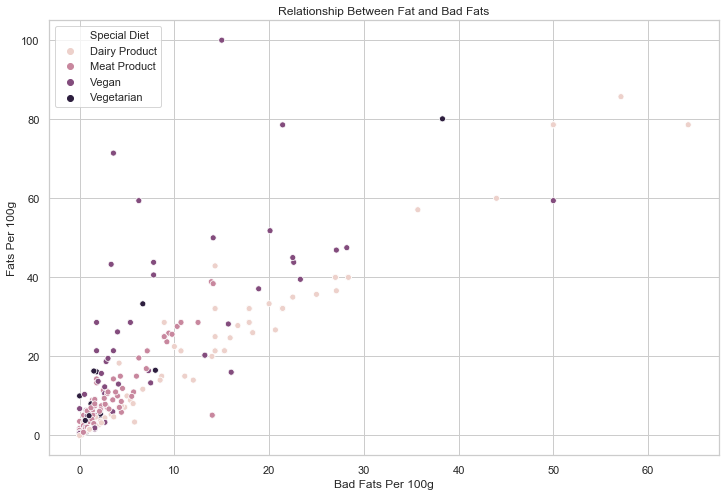

In [96]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=diets['bad-fats_100g'], 
                y=diets['fat_100g'], 
                hue=diets['Special Diet'],
                legend='full',
                palette=sns.cubehelix_palette(4), 
                hue_order=['Dairy Product','Meat Product','Vegan','Vegetarian'])

plt.title("Relationship Between Fat and Bad Fats")
plt.xlabel("Bad Fats Per 100g")
plt.ylabel("Fats Per 100g")

It looks like the fat content of dairy products is primarily derived from the unhealthy types of fats. Vegan and vegetarian tend to have lower values of bad fats per fat content while overall, meat products tend to be fairly low in fat. 

__How Does The Carbon Footprint Differ By Country?__

Text(0, 0.5, 'Average Carbon Footprint Per 100g')

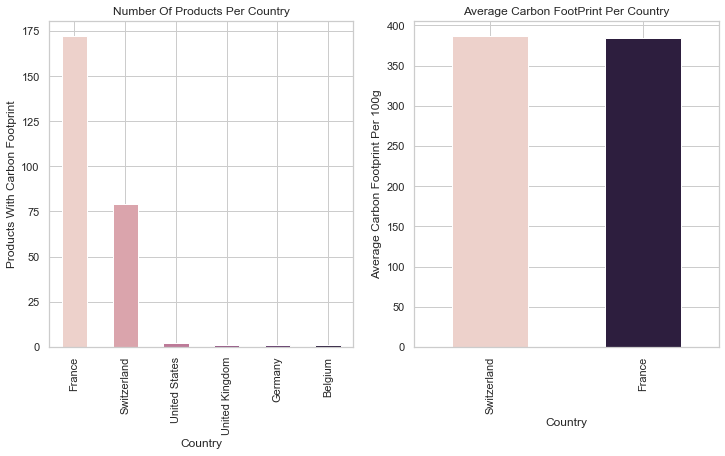

In [111]:
#selecting products that have carbon footprint listed.
#As every product has some type of carbon footprint, 
#a value = 0 indicates the products is missing information on carbon footprint 
carbon = food[food['carbon-footprint_100g'].notnull() & food['carbon-footprint_100g'] != 0]

#grouping count of carbon products per country 
count_carbon = carbon.groupby('country')['carbon-footprint_100g'].count().sort_values(ascending=False)

#selecting only france and switzerland and finding average carbon footprint value 
mask = (carbon['country']=='Switzerland') | (carbon['country']=='France')
carbon_country = carbon[mask]
avg_carbon = carbon_country.groupby('country')['carbon-footprint_100g'].mean().sort_values(ascending=False)

sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12,6))

count_carbon.plot.bar(color=(sns.cubehelix_palette(6)), ax=axs[0])
axs[0].set_title("Number Of Products Per Country")
axs[0].set_xlabel("Country")
axs[0].set_ylabel("Products With Carbon Footprint")

avg_carbon.plot.bar(color=(sns.cubehelix_palette(2)),ax=axs[1])
axs[1].set_title("Average Carbon FootPrint Per Country")
axs[1].set_xlabel("Country")
axs[1].set_ylabel("Average Carbon Footprint Per 100g")

France and Switzerland are the only countries to provide information on the carbon footprint of their products. Their products have about the same mean carbon footprint. 

__What Nutrients Are Related To Carbon Footprint?__

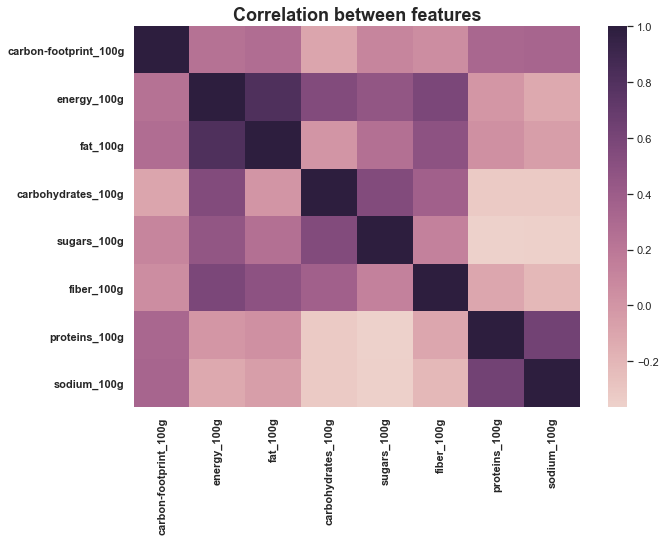

In [112]:
carbon_corr=carbon_country[['carbon-footprint_100g','energy_100g','fat_100g',  'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g']].corr()
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(carbon_corr, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()


It looks like there's a fairly strong positive relationship between a product's carbon footprint and the amount of protein and sodium it contains. 

Let's look into the category tags of these products by country using a word cloud. 

In [123]:
from collections import Counter
from wordcloud import WordCloud

def wordcloud_(df,label):
    words = [] #create list to store words in the string in the column 
    
    for string in df[label]: #split words on commas and append to list
        listwords= str(string).split(',')
        for word in listwords:
            if (word!=' ')and (word!='nan'):
                words.append(word)
    count=Counter(words) #count frequencies of words
        
    #create word cloud 
    wordcloud = WordCloud(background_color='white',width=850, height=500, colormap=sns.cubehelix_palette(as_cmap=True)).fit_words(count)
    plt.figure(figsize=(25,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.show()

__Categories: Switzerland__

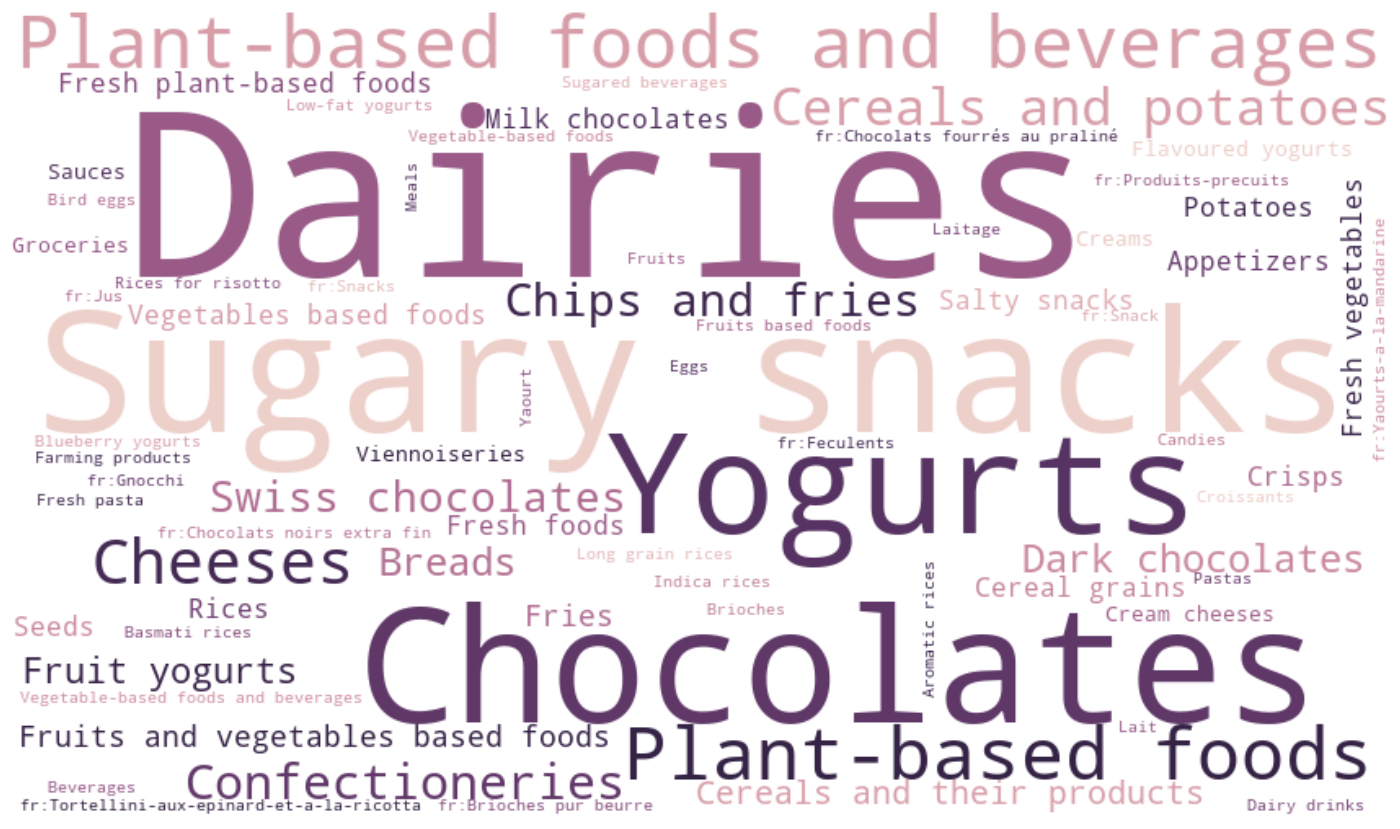

In [124]:
wordcloud_(carbon_country[carbon_country['country']=='Switzerland'], label = 'categories_en')

__Categories: France__

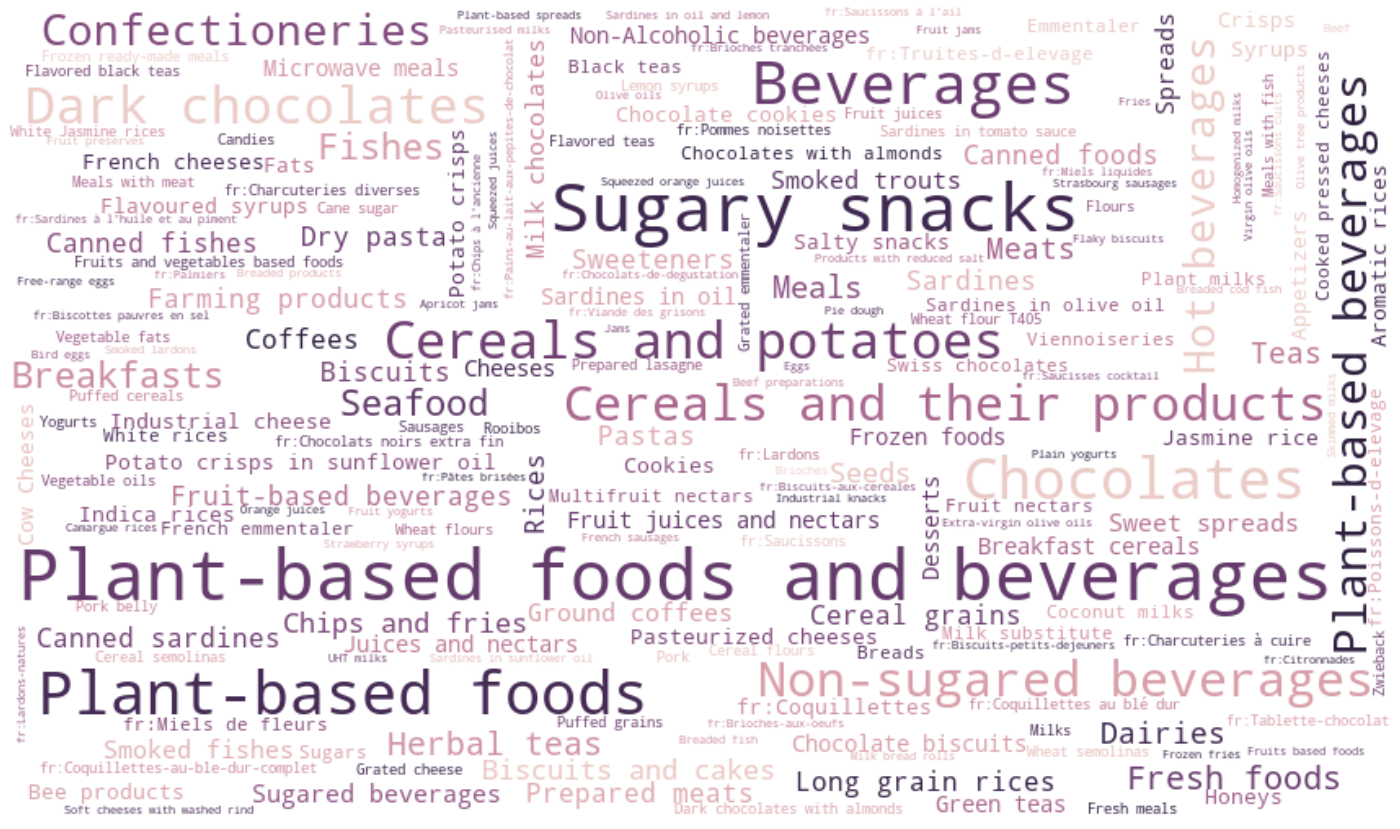

In [125]:
wordcloud_(carbon_country[carbon_country['country']=='France'], label = 'categories_en')

From Switzerland's word cloud, you can tell their popular products are dairy, yogurt, chocolate, sugary snack's and plant based foods. France also has a number of plant based products, chocolate, and sugary snacks while differing from Switzerland in the popularity of non-sugar beverages and cereal products. Compared to Switzerland, France has both a greater number of products in this dataset and a greater variety of popular product categories. 

__Concluding Thoughts__

We found that Italy may have a bit of a sweet tooth, offering products that tend to have the highest average amounts of sugar and bad-fats per 100 grams. Australia's products contain the highest average amounts of sodium and fiber. Given the sodium content tends to be higher in packaged goods, this could imply that Australia eats more processed and packaged food than other countries. Australia also offers a high proportion of vegetarian products, which tend to have high fiber content. When combined with the fact that Australia's products contained the highest average amounts of fiber, this may indicate a strong preference of vegetarian food items in Australia. 

Switzerland and France are the only countries that record the carbon-footprint of their products, suggesting a more environmentally conscious population. They both intersect in their preference for chocolate, sugary snacks, and plant-based products. Switzerland's food items boast the highest average protein value while also offering many dairy and yogurt products. France offers the greatest proportion of meat products while non-sugar beverages and cereal products are quite popular. 

While the US may not have had the highest averages for specific nutrients, they offer products with the most extreme amounts of protein and fiber. This may imply the existence of a health conscious market within the US, focused on taking supplements or food products merely for their nutritional value. 

Spain earns the gold medal when it comes to the amount of vegan products offered. This may suggest the existence of a large market for plant-based, meat alternatives. 

Overall, it is important to remember the that insights in this dataset reflect the products uploaded to the open food facts database. The data offers interesting tidbits about the ways different countries eat however, it may not be representative of the general eating habits of the whole population of these countries. 